In [ ]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [ ]:
url="https://www.cars24.com/buy-used-car/?sort=P&storeCityId=3686&pinId=500001&utm_source=google&utm_medium=cpc&utm_campaign=search_buyer_hyderabad_LNF&utm_source=google&utm_medium=cpc&utm_campaign=search_buyer_hyderabad_LNF&utm_keyword=online%20car%20buying%20sites&utm_matchtype=p&utm_device=c&adgroup_id=171668699417&campaign_id=22154774875&gclid=Cj0KCQjwnui_BhDlARIsAEo9GutoZUAdgblqrURBZ2AFmEP8gcN-JbnfD0r5NkKm0apJ4Y1mhzszYQkaAkhIEALw_wcB&gad_source=1"

In [ ]:
page=requests.get(URL)
page.status_code

In [ ]:
htmlcode=page.text
soup=BeautifulSoup(htmlcode)

In [ ]:
content=soup.find('div',attrs={"class":"styles_carListingContainer__uob_6"})
#print(content)
text=content.text
print(text)

In [ ]:
content=soup.find('div',attrs={"class":"styles_carListingContainer__uob_6"})
text=content.text.strip()
#print(text)
r1=text.split("\n")
r2=r1[0].split(",")
r3=[]
for i in range(0,len(r2)-1,2):
    r3.append(r2[i]+r2[i+1])

In [ ]:
for i in range(len(r3)):
    print(r3[i])
    print()
    print()

In [ ]:
r4=[]
for i in r3:
  x=i.split('.')
  r4.append(x)
for x in r4:
  print(x)
  print()
  print()

In [ ]:
for i in range(4):
  del r4[-1]
for i in r4:
  if len(i)<3:
    r4.remove(i)
for x in r4:
  print(x)
  print()
  print()

In [ ]:
car_models = []
prices = []
locations = []

for i in r4:
    car_model = i[0]
    price = i[1]
    location = i[2]
    car_models.append(car_model)
    prices.append(price)
    locations.append(location)

locations.pop(6)
locations.pop(2)
locations.pop(6)
locations.pop(6)
locations.pop(6)
locations.pop(6)
locations.pop(6)
locations.pop(5)
locations.pop(6)
locations.pop(5)
locations.pop(5)
locations.pop(5)
locations.pop(5)
locations.pop(5)
car_models.pop(4)
car_models.pop(4)
car_models.pop(5)
car_models.pop(5)
car_models.pop(5)
car_models.pop(5)
car_models.pop(5)
car_models.pop(5)
car_models.pop(5)
car_models.pop(5)
car_models.pop(5)
car_models.pop(5)
car_models.pop(5)
car_models.pop(5)
prices.pop(2)
prices.pop(6)
prices.pop(6)
prices.pop(6)
prices.pop(6)
prices.pop(6)
prices.pop(6)
prices.pop(6)
prices.pop(6)
prices.pop(6)
prices.pop(6)
prices.pop(6)
prices.pop(6)
prices.pop(5)


print("Models:", len(car_models), car_models)
print("Prices:", len(prices), prices)
print("Locations:", len(locations), locations)

Models: 5 ['PreviousNext320 Used cars in Hyderabad2016 Maruti Swift Dzire\xa0VDI (O)96', ' Hyderabad2020 Maruti Dzire\xa0VXI AMT32', ' Hyderabad2017 Hyundai Elite i20\xa0ASTA 1', ' Hyderabad2020 Maruti Swift\xa0VXI65', ' Hyderabad2021 Nissan MAGNITE\xa0XL52']
Prices: 5 ['17k kmDieselManual1st ownerEMI ₹12368/m₹5', '20k kmPetrolAuto1st ownerEMI ₹12356/m₹6', '53k kmPetrolManual1st ownerEMI ₹10831/m₹5', '68k kmPetrolManual1st ownerEMI ₹11730/m₹6', '79k kmPetrolManual1st ownerEMI ₹10616/m₹5']
Locations: 5 ['56 lakh+ other chargesCARS24 AssuredHighlights Bachupally', '32 lakh+ other chargesCARS24 AssuredHighlights Bachupally', '54 lakh+ other chargesCARS24 AssuredHighlights Bachupally', '00 lakh+ other chargesCARS24 AssuredHighlights Bachupally', '43 lakh+ other chargesCARS24 AssuredHighlights Kompally']


In [ ]:
df = pd.DataFrame({'Car_models':car_models,'Car Specifications':prices,'Locations':locations})
df['Locations']=df['Locations'].apply(lambda x:x.split()[-1])
df['Car_models']=df['Car_models'].apply(lambda x:' '.join(x.split()[1:]))
df['Car_models']= df['Car_models'].str.replace(r'^Used cars in Hyderabad2016\s*','',regex=True)
df


,Car_models,Car Specifications,Locations
0,Maruti Swift Dzire VDI (O)96,17k kmDieselManual1st ownerEMI ₹12368/m₹5,Bachupally
1,Maruti Dzire VXI AMT32,20k kmPetrolAuto1st ownerEMI ₹12356/m₹6,Bachupally
2,Hyundai Elite i20 ASTA 1,53k kmPetrolManual1st ownerEMI ₹10831/m₹5,Bachupally
3,Maruti Swift VXI65,68k kmPetrolManual1st ownerEMI ₹11730/m₹6,Bachupally
4,Nissan MAGNITE XL52,79k kmPetrolManual1st ownerEMI ₹10616/m₹5,Kompally


In [ ]:
df. to_csv('cars2025.csv', header=True, index=False)
from google.colab import files
files.download('cars2025.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

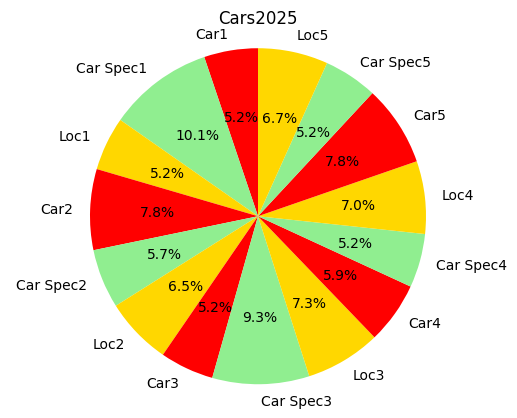

In [ ]:
labels=['Car1','Car Spec1','Loc1','Car2','Car Spec2','Loc2','Car3','Car Spec3','Loc3','Car4','Car Spec4','Loc4','Car5','Car Spec5','Loc5']
sizes=[200,390,200,300,220,250,200,360,280,229,200,270,300,200,260]
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90,colors=['red','lightgreen','gold'])
plt.title('Cars2025')
plt.axis('equal')
plt.show()

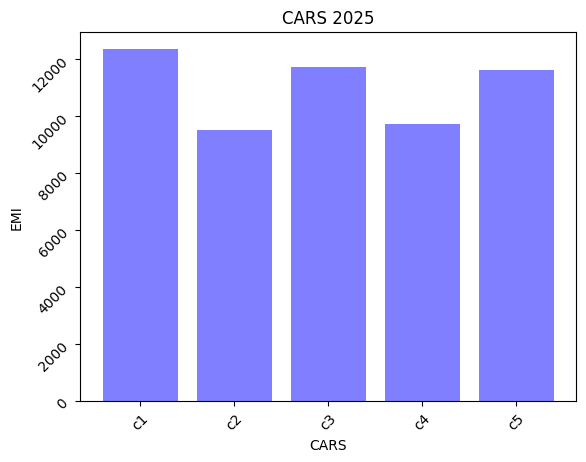

In [ ]:
CARS=['c1','c2','c3','c4','c5']
EMI=[12356,9521,11730,9736,11613]
plt.bar(CARS,EMI, color='blue',alpha=0.5)
plt.title('CARS 2025')
plt.xlabel('CARS')
plt.ylabel('EMI')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

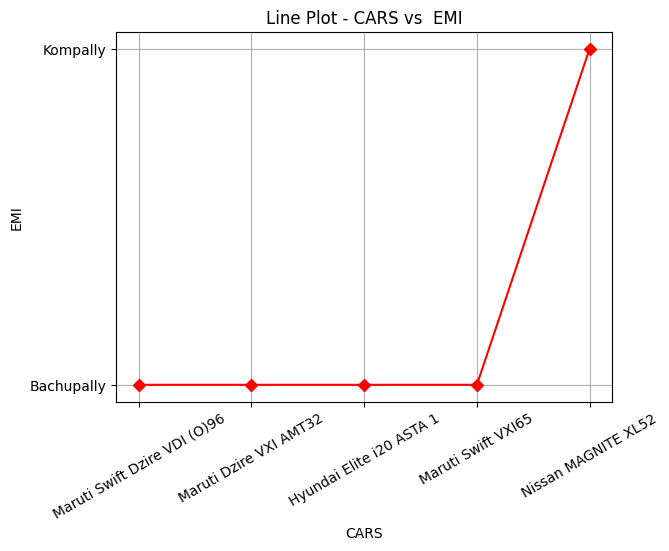

In [ ]:
plt.plot(df['Car_models'],df['Locations'], marker='D',linestyle='-',color='red')
plt.title('Line Plot - CARS vs  EMI')
plt.xlabel('CARS')
plt.ylabel('EMI')
plt.grid(True)
plt.yticks(rotation=0)
plt.xticks(rotation=30)

plt.show()
